In this tutorial, we are using DeepProtein to create 2D protein data, processing personal protein data and see if it could be trained.

# Install Packages

In [1]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install lmdb seaborn wandb pydantic DeepPurpose
!pip install transformers bitsandbytes
!pip install accelerate>=0.26.0
!pip install SentencePiece einops rdchiral peft
!pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2
!pip install datasets

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-ceaup40j
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-ceaup40j
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 61.4 MB/s eta 0:00:00
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1082894 sha256=c2c36800b48316672f0ffc051eebfa6b8189dccb07dfca3ad435be2b514bc3ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-5y5z_5v9/wheels/a5/37/b0/bc8b04ad2a1d1f3e17a7bff134d2a7e63621914e0a01d983a6
Successfully built descriptastorus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00


In [2]:
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu118
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/cu118/repo.html
!pip install PyTDC

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 119.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!git clone https://github.com/jiaqingxie/DeepProtein.git

Cloning into 'DeepProtein'...
remote: Enumerating objects: 4444, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 4444 (delta 29), reused 41 (delta 15), pack-reused 4384 (from 2)
Receiving objects: 100% (4444/4444), 205.46 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (2550/2550), done.
Updating files: 100% (420/420), done.


In [4]:
import sys
sys.path.append("/content/DeepProtein/")

# Data Generation

In [5]:
from DeepProtein.your_data import *

In [6]:
generate_protein_aim_pairs(count=100,
              filename="protein_aim.csv",
              sep=",",
              with_two_proteins=False)

Write 100 rows to the file protein_aim.csv，format=with_two_proteins=False.


If you have such file, please ignore this generation step.

# Processing

In [7]:
data_2col = read_protein_aim_file("protein_aim.csv", sep=",")


train, valid, test split, ratio: 5:3:2

In [8]:
train, val, test = split_data(data_2col, ratio=(0.5, 0.3, 0.2), shuffle=True)


In [18]:
train_df = pd.DataFrame(train, columns=["Target Sequence", "Label"])

In [19]:
val_df = pd.DataFrame(val, columns=["Target Sequence", "Label"])

In [20]:
test_df = pd.DataFrame(test, columns=["Target Sequence", "Label"])

# Training 1: Single Protein Regression

Please note that it's just a demo so the results are random, here we just want to make sure that your file could be correctly loaded into DeepProtein and trained.

In [10]:
from DeepProtein.load_dataset import *
import DeepProtein.ProteinPred as models

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


load configuration

In [11]:
train, val, test = load_single_dataset("Custom", path="/content", method="CNN", your_file="protein_aim.csv")

Protein Function Prediction Mode...
in total: 50 proteins
encoding protein...
unique target sequence: 50
Done.
Protein Function Prediction Mode...
in total: 30 proteins
encoding protein...
unique target sequence: 30
Done.
Protein Function Prediction Mode...
in total: 20 proteins
encoding protein...
unique target sequence: 20
Done.


In [12]:
lr = 0.0001
epochs = 20
batch_size = 4
seed = 7

In [13]:
config = generate_config(target_encoding='CNN',
                cls_hidden_dims=[1024, 1024],
                train_epoch=epochs,
                LR=lr,
                batch_size=batch_size ,
                )
config['multi'] = False

In [14]:
torch.manual_seed(seed)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 5482.17. Total time 0.0 hours
Validation at Epoch 1 , MAE: 54.3639 , MSE: 3836.79 , Spearman Correlation: -0.0892 with p-value: 6.39E-01 , Concordance Index: 0.46206
Training at Epoch 2 iteration 0 with loss 2429.69. Total time 0.0 hours
Validation at Epoch 2 , MAE: 53.9455 , MSE: 3791.48 , Spearman Correlation: -0.1577 with p-value: 4.05E-01 , Concordance Index: 0.45747
Training at Epoch 3 iteration 0 with loss 2471.21. Total time 0.0 hours
Validation at Epoch 3 , MAE: 52.7979 , MSE: 3668.98 , Spearman Correlation: -0.0843 with p-value: 6.58E-01 , Concordance Index: 0.48045
Training at Epoch 4 iteration 0 with loss 3020.10. Total time 0.00027 hours
Validation at Epoch 4 , MAE: 49.1070 , MSE: 3265.10 , Spearman Correlation: 0.05984 with p-value: 7.53E-01 , Concordance Index: 0.53103
Training at Epoch 5 iteration 0 with loss 3616.33. Total time 0.00027 hours
Validation at Epoch 5 

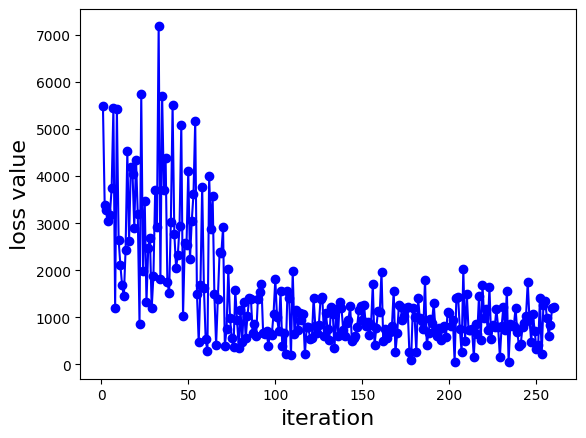

In [17]:
import DeepProtein.ProteinPred as models
model = models.model_initialize(**config)
import wandb
wandb.init(mode='offline', name = "Test")
model.train(train, val, test, compute_pos_enc = False)

# Training 2: Protein Pair Regression

In [21]:
generate_protein_aim_pairs(count=100,
              filename="protein_protein_aim.csv",
              sep=",",
              with_two_proteins=True)

Write 100 rows to the file protein_protein_aim.csv，format=with_two_proteins=True.


In [22]:
data_2col = read_protein_aim_file("protein_protein_aim.csv", sep=",")

In [23]:
train, val, test = split_data(data_2col, ratio=(0.5, 0.3, 0.2), shuffle=True)

load dataset and configuration

In [25]:
train, val, test = load_pair_dataset("Custom", path="/content", method="CNN", your_file="protein_protein_aim.csv")

Protein Protein Interaction Prediction Mode...
in total: 50 protein-protein pairs
encoding protein...
unique target sequence: 50
encoding protein...
unique target sequence: 50
Done.
Protein Protein Interaction Prediction Mode...
in total: 30 protein-protein pairs
encoding protein...
unique target sequence: 30
encoding protein...
unique target sequence: 30
Done.
Protein Protein Interaction Prediction Mode...
in total: 20 protein-protein pairs
encoding protein...
unique target sequence: 20
encoding protein...
unique target sequence: 20
Done.


In [26]:
lr = 0.0001
epochs = 20
batch_size = 4
seed = 7

In [27]:
config = generate_config(target_encoding='CNN',
                cls_hidden_dims=[1024, 1024],
                train_epoch=epochs,
                LR=lr,
                batch_size=batch_size ,
                )
config['multi'] = False

In [28]:
torch.manual_seed(seed)


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 1396.40. Total time 0.0 hours
Validation at Epoch 1 , MAE: 40.0218 , MSE: 2460.91 , Pearson Correlation: 0.00596 with p-value: 9.75E-01 , Concordance Index: 0.47356
Training at Epoch 2 iteration 0 with loss 6188.97. Total time 0.0 hours
Validation at Epoch 2 , MAE: 39.2681 , MSE: 2401.15 , Pearson Correlation: 0.07742 with p-value: 6.84E-01 , Concordance Index: 0.55402
Training at Epoch 3 iteration 0 with loss 3981.96. Total time 0.00027 hours
Validation at Epoch 3 , MAE: 36.7584 , MSE: 2197.89 , Pearson Correlation: -0.0503 with p-value: 7.92E-01 , Concordance Index: 0.49655
Training at Epoch 4 iteration 0 with loss 2407.71. Total time 0.00027 hours
Validation at Epoch 4 , MAE: 30.0929 , MSE: 1536.08 , Pearson Correlation: -0.1019 with p-value: 5.92E-01 , Concordance Index: 0.46206
Training at Epoch 5 iteration 0 with loss 102.558. Total time 0.00027 hours
Validation at Epoch 5 

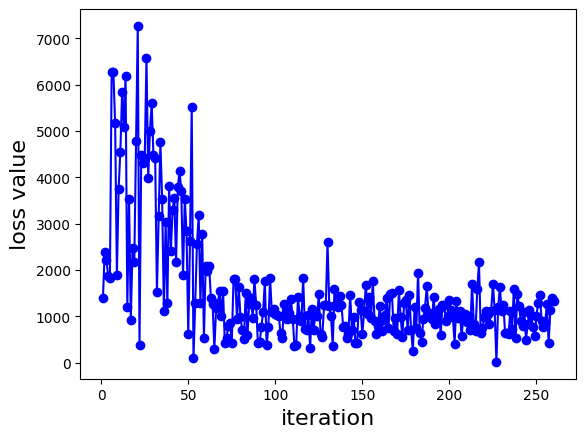

In [30]:
import DeepProtein.PPI as models
model = models.model_initialize(**config)
import wandb
wandb.init(mode='offline', name = "Test")
model.train(train, val, test)